# Assignment 1
## Basic Hebbian Learning

In [275]:
import numpy as np
from matplotlib import pyplot as plt

In [276]:
#1) Load dataset
u = np.loadtxt("../lab2_1_data.csv", delimiter=",", unpack=True)

In [277]:
#2) Implement a linear firing rate model
def linear_model(u,w):
    return np.dot(u,w)

Epoch 0 of 500
Epoch 50 of 500
Epoch 100 of 500
Epoch 150 of 500
Stopped at epoch 199


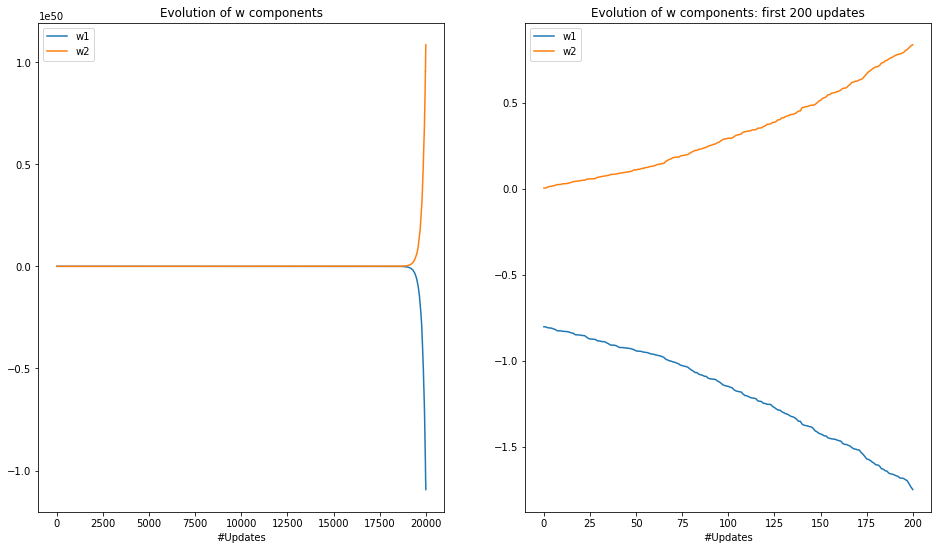

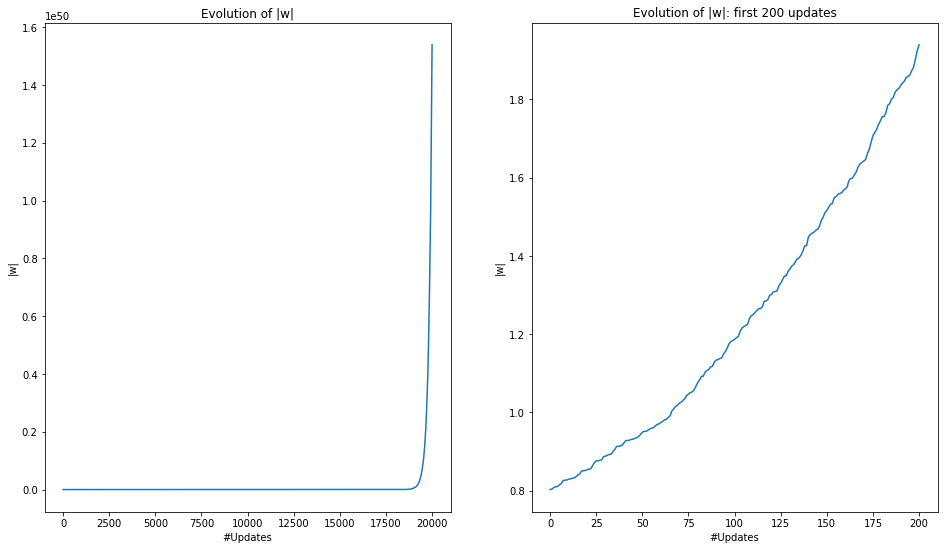

In [278]:
#3) Implement Basic Hebb Rule
name = 'Basic_Hebbian_Rule'
#randomly initialized wheight vector, from a uniform distribution [-1,1]
w = np.random.rand(2)*2 - 1 

#parameters
eta = 0.01
threshold = 1e-3
epochs = 500

#to keep track of evolution of w during training
w_hist = w
wold = w

for N in range (epochs):


    if N % (epochs/10) == 0:
        print(f"Epoch {N} of {epochs}")

    #shuffle the input dataset
    uu = np.random.permutation(u)  

    for i in range (len(uu)):
        #Compute output
        v = linear_model(uu[i], w)
        #Hebbian rule
        w = w + eta*v*uu[i]

        w_hist = np.vstack((w_hist, w))
    
    #stop learning if w stabilizes
    if np.linalg.norm(w-wold) < threshold:
        print(f"Stopped at epoch {N}")
        break
    if np.linalg.norm(w) > 1e50:
        print(f"Stopped at epoch {N}")
        break
    wold = w


#plot P2
w1 = (np.transpose(w_hist))[0]
w2 = (np.transpose(w_hist))[1]
w_norm = np.sqrt(w1**2+w2**2)
t=np.arange(0,len(w1))

plt.figure(figsize=(16, 9))
ax1 = plt.subplot(1,2,1)
plt.title('Evolution of w components')
plt.plot(t,w1, label='w1')
plt.plot(t,w2, label='w2')
ax1.set_xlabel('#Updates')
plt.legend()

ax2 = plt.subplot(1,2,2)
xmax = int(len(w1)/100)
plt.title(f'Evolution of w components: first {xmax} updates')
mask = (t <= xmax)
plt.plot(t[mask], w1[mask], label='w1')
plt.plot(t[mask], w2[mask], label='w2')
plt.legend()
ax2.set_xlabel('#Updates')

plt.savefig(name + '_w_evolution',format='pdf')


plt.figure(figsize=(16, 9))
ax1 = plt.subplot(1,2,1)
plt.title('Evolution of |w|')
ax1.set_ylabel('|w|')
ax1.set_xlabel('#Updates')

plt.plot(t,w_norm)


ax2 = plt.subplot(1,2,2)
xmax = int(len(w1)/100)
plt.title(f'Evolution of |w|: first {xmax} updates')
mask = (t <= xmax)
plt.plot(t[mask], w_norm[mask])
ax2.set_ylabel('|w|')
ax2.set_xlabel('#Updates')

plt.savefig(name + '_|w|_evolution',format='pdf')



plt.show()

w [-1.09255687e+50  1.08411330e+50]
[[ 0.32640973 -0.25904598]
 [-0.25904598  0.321666  ]]


 max eigvect [ 0.71033647 -0.70386228]
0.7103364653931533


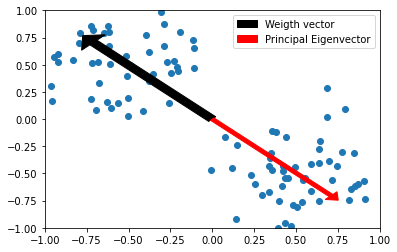

In [279]:
#P1
u1 = (np.transpose(u))[0]
u2 = (np.transpose(u))[1]
plt.scatter(u1,u2)
#plt.quiver(*w, scale=1, label = 'Weight vector' )
plt.arrow(0,0, w[0]/np.linalg.norm(w), w[1]/np.linalg.norm(w) , width=0.06, head_width=0.2, head_length=0.09, label='Weigth vector', color = 'black')
plt.xlim(-1,1)
plt.ylim(-1,1)
print('w',w)

Q = np.array([[0,0], [0,0]])
for i in range (len(u)):
     Q = Q + np.outer(u[i],u[i])

Q = Q/len(u)

print(Q)
eig_val, eig_vec = np.linalg.eig(Q)
#print(eig_val)
n = np.argmax(eig_val)
max_eigvect = eig_vec[:,n]
print('\n\n max eigvect',max_eigvect)

print(max_eigvect[0])
#plt.quiver(max_eigvect[0], max_eigvect[1], color='red', label = 'principal eigenvector')
plt.arrow(0,0, max_eigvect[0], max_eigvect[1] , width=0.03, head_width=0.1, head_length=0.06, label='Principal Eigenvector', color = 'red')

plt.legend()
plt.show()

